In [1]:
import os
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
os.chdir("./storage/ppo-static-city/MiniGrid-GridCity-4S30Static-v0")

In [8]:
columns=['exp', 'trial', 'update', 'frames', 'FPS', 'duration', 'difficulty', 'return_mean',
       'return_std', 'return_min', 'return_max', 'num_frames_mean',
       'num_frames_std', 'num_frames_min', 'num_frames_max', 'entropy',
       'value', 'policy_loss', 'value_loss', 'grad_norm', 'return_mean.1',
       'return_std.1', 'return_min.1', 'return_max.1']
logs = pd.DataFrame(columns=columns)

for exp in os.listdir("."):
    os.chdir(exp)
    for trial in os.listdir("."):
        os.chdir(trial)
        log = pd.read_csv("log.csv")
        log['exp'] = exp
        log['trial'] = trial
        args = json.load(open('args.json', 'r'))
        for k, v in args.items():
            if k not in columns:
                log[k] = v

        logs = pd.concat([logs, log], axis=0, sort=False)
        os.chdir("..")
    os.chdir("..")    

In [53]:
grouped = logs.groupby('exp')

ncols=2
nrows = int(np.ceil(grouped.ngroups/ncols))
columns = ['difficulty', 'lr', 'recurrence']
results = pd.DataFrame(columns=columns)
for key in grouped.groups.keys():
    res = grouped.get_group(key).groupby('trial')['difficulty', 'lr', 'recurrence'].max().max()
    results = results.append(pd.DataFrame(res).transpose())

In [54]:
results.sort_values('difficulty', ascending=False)

,difficulty,lr,recurrence
0,23.0,0.005126,1.0
0,21.0,0.003328,8.0
0,10.0,0.001522,16.0
0,9.0,0.008439,1.0
0,9.0,0.005393,16.0
0,8.0,0.009014,8.0
0,7.0,0.006356,8.0
0,6.0,0.008207,16.0
0,6.0,0.006960,16.0
0,4.0,0.000833,8.0


TypeError: Empty 'DataFrame': no numeric data to plot

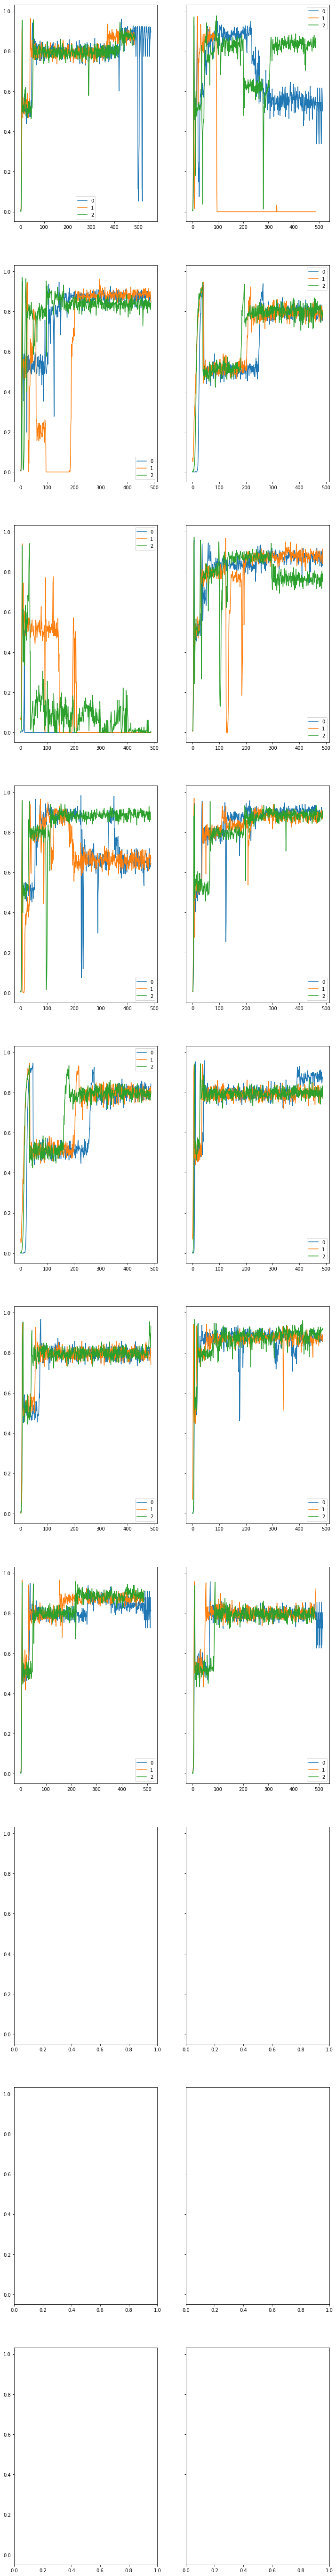

In [17]:
grouped = logs.groupby('exp')

ncols=2
nrows = int(np.ceil(grouped.ngroups/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 100), sharey=True)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    grouped.get_group(key).groupby('trial')['return_mean'].plot(ax=ax, legend=True)

ax.legend()
plt.show()



TypeError: Empty 'DataFrame': no numeric data to plot

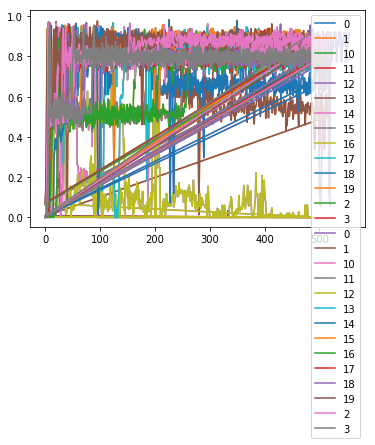

In [7]:
logs.groupby('exp')['return_mean'].plot(legend=True)

In [ ]:
pd.read_csv("storage/ppo-static-city/MiniGrid-GridCity-4s30Static-v0")

In [207]:
logs = pickle.load(open("log.txt", "rb"))

In [214]:
y = []
x = []
yerr = []
for log in logs:
    y.append(np.mean(log['target_path_length']))
    yerr.append(np.std(log['target_path_length']))
    x.append(log['difficulty'])

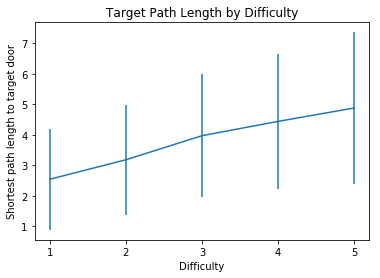

In [215]:
plt.errorbar(y=y, x=x, yerr=yerr)
plt.xticks(x)
plt.title("Target Path Length by Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Shortest path length to target door")
plt.savefig("target_path_length.png")
